# process spectra for AuxTel with new spectractor (March 2022) for particular config H, for Ronchi

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : May 20th 2022

- version v5 : Work with exposure butlen gen3


- Config H:

       
       After pull request from Jeremy on git-branch issue-auxteltarget
       
       pour faire simple, je propose une pull request d'une branche qui contient mes réglages vers ta branche issue-auxteltarget :

       https://github.com/LSSTDESC/Spectractor/pull/95
       

This notebook is to help for finding the position of order 0

CCIN2P3:

- works with kernels **anaconda3_auxtel** (with libradtran) and **anaconda3_auxtel_v2** (no libradtran)
- works with kernel **python 3** locally 

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
print(sys.path)

['/pbs/throng/lsst/users/dagoret/desc/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_03', '', '/opt/conda/lib/python3.8/site-packages', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python38.zip', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/lib-dynload', '/pbs/home/d/dagoret/.local/lib/python3.8/site-packages', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Deprecated-1.2.11-py3.8.egg', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/docopt-0.6.2-py3.8.egg', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/mimeparse-0.1.3-py3.8.egg', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg', '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/rail-0.1.dev0-py3.8.egg', 

In [3]:
all_paths_to_remove = ['/opt/conda/lib/python3.8/site-packages','/pbs/home/d/dagoret/.local/lib/python3.8/site-packages']

for path_to_remove in all_paths_to_remove:
    if path_to_remove in sys.path:
        print(f"remove {path_to_remove} from sys.path")
        sys.path.remove(path_to_remove)

remove /opt/conda/lib/python3.8/site-packages from sys.path
remove /pbs/home/d/dagoret/.local/lib/python3.8/site-packages from sys.path


In [4]:
sys.path

['/pbs/throng/lsst/users/dagoret/desc/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_03',
 '',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python38.zip',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/lib-dynload',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Deprecated-1.2.11-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/docopt-0.6.2-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/mimeparse-0.1.3-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/rail-0.1.dev0-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/pyarrow-4.0.1-

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib import  transforms
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
sys.path

['/pbs/throng/lsst/users/dagoret/desc/AuxTelComm/notebookccdm_gen3/runspectractor_standalone/2022_03',
 '',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python38.zip',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/lib-dynload',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Deprecated-1.2.11-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/docopt-0.6.2-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/mimeparse-0.1.3-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/rail-0.1.dev0-py3.8.egg',
 '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/pyarrow-4.0.1-

In [7]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/sps/lsst/groups/auxtel/softs/utils/anaconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]


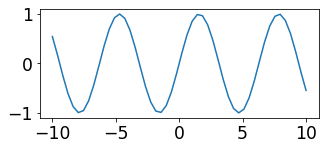

In [8]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               


In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from astropy.coordinates import Angle
from astropy import units as u
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [12]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("mu. Col")
print(result_table)
result_table = Simbad.query_object("HD111980")
print(result_table)
result_table = Simbad.query_object("eta1 dor")
print(result_table)

 MAIN_ID        RA           DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... ------------------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 2020yCat.1350....0G                1
 MAIN_ID        RA           DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... ------------------- ----------------
HD 111980 12 53 15.0529 -18 31 20.013 ... 2020yCat.1350....0G                1
  MAIN_ID         RA           DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                                     
----------- ------------- ------------- ... ------------------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 2020yCat.1350....0G                1


In [13]:
result_table = Simbad.query_object("ETA01 DOR")

In [14]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* eta01 Dor,06 06 09.3817,-66 02 22.635,14,14,0.052,0.049,90,A,O,2020yCat.1350....0G,1


In [15]:
result_table["RA"]

06 06 09.3817


In [16]:
ra = Angle('06 06 09.3817 hours').deg 
ra

91.53909041666665

In [17]:
dec=Angle('-66 02 22.635 degrees').deg 
dec

-66.03962083333333

In [18]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

In [19]:
from distutils.dir_util import copy_tree
import shutil

# Configuration

In [20]:
version="v5.0"  # version of flipping
# create output directories if not exist and clean existing files
FLAG_MANAGE_OUTPUT_SPECTRACTOR=True
# allow to run reconstruction with Spectractor
FLAG_GO_FOR_RECONSTRUCTION_WTH_SPECTRACTOR=True

FLAG_REMOVE_WCS=False

In [21]:
# Choose the config filename
list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configH_ronc.ini"]
config_idx = 7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]

# Path

In [22]:
# path index for each month
DATE="20220316"
disperserfiltername = "empty~ronchi170lpmm"

In [23]:
# select if we run at CC or not (locally) 
# /sps/lsst/groups/auxtel/data/2022/holo/20220317
HOSTCC=True

In [24]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+disperserfiltername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+disperserfiltername+"/"+configdir)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022/2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)

# Utility Functions

In [25]:
def is_nan(x):
    return (x != x)

# Logbook for input file selection

- the logbook contains all input image path and possibily the order 0 position

In [26]:
filename_logbook='logbooks/auxtelronchilogbook_'+DATE+'_' + version+'.csv'

In [27]:
df=pd.read_csv(filename_logbook,index_col=0)

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
# show the list of input files from the logbook to select the file index in the logbook
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,focus,seeing,pressure,temperature,humidity,windspd
0,0,2022-03-17T02:01:36.967,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600334_postisrccd.fits,334,eta dor,empty_1,ronchi170lpmm,1.389254,2.0,0.041059,0.690994,743.55,10.6,44.0,7.8
1,1,2022-03-17T02:01:51.934,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600335_postisrccd.fits,335,eta dor,empty_1,ronchi170lpmm,1.389746,20.0,0.041059,0.690994,743.55,10.6,45.0,7.9
2,2,2022-03-17T02:02:25.113,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600336_postisrccd.fits,336,eta dor,empty_1,ronchi170lpmm,1.390854,20.0,0.041059,0.901880,743.55,10.6,45.0,7.9
3,3,2022-03-17T02:04:15.406,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600339_postisrccd.fits,339,eta dor,empty_1,ronchi170lpmm,1.394221,2.0,0.041059,0.888362,743.55,10.6,44.0,9.6
4,4,2022-03-17T02:04:42.650,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600340_postisrccd.fits,340,eta dor,empty_1,ronchi170lpmm,1.395503,2.0,0.041059,0.769506,743.55,10.6,44.0,9.6
5,5,2022-03-17T02:05:03.885,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600341_postisrccd.fits,341,eta dor,empty_1,ronchi170lpmm,1.396225,2.0,0.041059,0.769506,743.55,10.6,43.0,7.7
6,6,2022-03-17T02:05:18.889,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600342_postisrccd.fits,342,eta dor,empty_1,ronchi170lpmm,1.396737,20.0,0.041059,0.769506,743.55,10.6,43.0,7.7
7,7,2022-03-17T02:05:51.894,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600343_postisrccd.fits,343,eta dor,empty_1,ronchi170lpmm,1.397864,20.0,0.041059,0.707492,743.55,10.5,43.0,8.2
8,8,2022-03-17T02:08:45.652,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600346_postisrccd.fits,346,HD111980,empty_1,ronchi170lpmm,1.665598,2.0,0.041059,0.636733,743.65,10.5,42.0,6.1
9,9,2022-03-17T02:09:12.307,/sps/lsst/groups/auxtel/data/2022/empty~ronchi...,exposure_2022031600347_postisrccd.fits,347,HD111980,empty_1,ronchi170lpmm,1.662427,2.0,0.041059,0.636733,743.65,10.5,42.0,6.1


# Selection of input file
- the input file is selected from the logbook list above

In [30]:
idx=0

In [31]:
print(df.iloc[idx]['file'])

exposure_2022031600334_postisrccd.fits


In [32]:
print(df.iloc[idx])

index                                                          0
date                                     2022-03-17T02:01:36.967
path           /sps/lsst/groups/auxtel/data/2022/empty~ronchi...
file                      exposure_2022031600334_postisrccd.fits
num                                                          334
object                                                   eta dor
filter                                                   empty_1
disperser                                          ronchi170lpmm
airmass                                                  1.38925
exposure                                                       2
focus                                                  0.0410588
seeing                                                  0.690994
pressure                                                  743.55
temperature                                                 10.6
humidity                                                      44
windspd                  

In [33]:
myhome=os.getenv("HOME")

In [34]:
dir_images=path_images

In [35]:
dir_images

'/sps/lsst/groups/auxtel/data/2022/empty~ronchi170lpmm/20220316'

In [36]:
filename_image=df['file'][idx]
filename_image

'exposure_2022031600334_postisrccd.fits'

In [37]:
target = df['object'][idx]
target

'eta dor'

## If order 0 position exists in logbook it is selected, otherwise put it by hand

In [38]:
if 'Obj-posXpix' in df.columns:
    x0=df['Obj-posXpix'][idx]
else:
    x0=300
    
if 'Obj-posYpix' in df.columns:    
    y0=df['Obj-posYpix'][idx]
else:
    y0=1700

In [39]:
FLAG_ORDER0_LOCATION=False

In [40]:
if not is_nan(x0)and not is_nan(y0):
    FLAG_ORDER0_LOCATION=True
    print("Order 0 location from logbook : ({},{})".format(x0,y0))
else:
    print("NO Order 0 location from logbook ! ")      

Order 0 location from logbook : (300,1700)


## Spectractor Configuration 

- Usually the Spectractor configuration file is put in local dir **./config**


Ma suggestion, pour l'étude du centre optique via les scans des hologrammes, est de **mettre SPECTRACTOR_COMPUTE_ROTATION_ANGLE sur False** . 

Comme les angles ne sont pas très grands, si les marges du rectangle sont assez larges, réglables avec : 

    [background subtraction parameters] 
    # half transverse width of the signal rectangular window in pixels 
    PIXWIDTH_SIGNAL = 40 

alors le spectrogramme devrait tenir dans une boite rectangulaire même sans rotation de l'image. **L'important est de garder SPECTRACTOR_DECONVOLUTION_FFM à True car c'est lui qui te donnera l'angle de l'axe de dispersion ajusté sur les données, dont la valeur sera dans le mot clé ROTANGLE du header de sortie**. 


In [41]:
rootfilename = filename_image.split(".")[0]
rootfilename_split =  rootfilename.split("_") 
filenumberdir = rootfilename_split[1] 

In [42]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/empty~ronchi170lpmm/ronc/20220316'

In [43]:

# Fullfilename
filename=os.path.join(dir_images,filename_image)


# subdirectory
#subdir=filename_image.split(".")[0]
subdir=filenumberdir

# final output directory (where results will be copied to be backed up at the end)
finalpath_output_spectractor=os.path.join(path_output_spectractor,subdir)


# local directories to put spectra and plots
if configdir =="":
    output_directory="./outputs_process_ronchi"
    output_figures="figures_process_ronchi"
else:
    output_directory = "./outputs_process_ronchi_" + configdir
    output_figures   = "./figures_process_ronchi_" + configdir
    
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)
    

# Final output directory


guess = [300,1700]
disperser_label = "ronchi170lpmm"
# old version
# config = os.path.join(path_spectractor_config,"auxtel_quicklook.ini")
# new version (September 20th 2021)

# configuration

# standard spectractor init configuration
#config = os.path.join(path_spectractor_config,"auxtel.ini")
# special for scan in XY
if configdir=="":
    config="./config/auxtel_scanXY.ini"
else:
    config=configfilename
    
target=df.iloc[idx]["object"]

In [44]:
if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
if not os.path.isdir(output_figures):
    os.mkdir(output_figures)

In [45]:
print("config filename",config)

config filename ./config/auxtel_configH_ronc.ini


In [46]:
finalpath_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/empty~ronchi170lpmm/ronc/20220316/2022031600334'

### manage output dir

In [47]:
def cleandir(path):
    if os.path.isdir(path):
        files=os.listdir(path)
        if len(files) > 0:
            for f in files:
                if os.path.isdir(os.path.join(path,f)):
                    if f==".ipynb_checkpoints":
                        shutil.rmtree(os.path.join(path,f))
                    else:
                        print(" Cannot remove this directory {}".format(os.path.join(path,f)))
                else:
                    os.remove(os.path.join(path,f))

In [48]:
# this flag must be set if one want to clean results from previous runs
if FLAG_MANAGE_OUTPUT_SPECTRACTOR:
    
    # manage global output directory of spectractor
    # Basically it has the name of the input file image
    
    # added recently    
    if configdir !="":
    # top directory    
        if not os.path.isdir(path_topoutput_spectractor):
            os.mkdir(path_topoutput_spectractor)   
            
            
        if not os.path.isdir(path_output_spectractor):
            os.mkdir(path_output_spectractor)

    
    if not os.path.isdir(output_directory):
        os.mkdir(output_directory)
    else:
        cleandir(output_directory)
 
    # manage subdirs spectrum/ and plots/
    if not os.path.isdir(output_figures):
        os.mkdir(output_figures)
    else:
        cleandir(output_figures)
    
    if not os.path.isdir(finalpath_output_spectractor):
        os.mkdir(finalpath_output_spectractor)
        os.mkdir(os.path.join(finalpath_output_spectractor,"basespec"))
        os.mkdir(os.path.join(finalpath_output_spectractor,"plots"))
    else:
        #cleandir(finalpath_output_spectractor)
        cleandir(os.path.join(finalpath_output_spectractor,"basespec"))
        cleandir(os.path.join(finalpath_output_spectractor,"plots"))

In [49]:
# /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo"

# Configuration of the Spectractor running mode

In [50]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [51]:
target

'eta dor'

## Load the image in the new image file with Spectractor

In [52]:
#image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)
image=Image(file_name=filename, disperser_label=disperser_label, config=config)

No rebinning: parameters.REBIN is forced to 1.


2022-05-20 17:10:25  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.396545452188295 but average of self.read_out_noise is 8.5.


target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 0.0000590                1


In [53]:
image.data.shape

(4072, 4000)

## Show relevant parameters

In [54]:
print(parameters)

<module 'spectractor.parameters' from '/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/parameters.py'>


In [55]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH=output_figures

In [56]:
image.filter_label

''

In [57]:
image.header["FILTER"]

'empty_1'

In [58]:
image.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2022-03-17T02:01:04.816'                                             
DATE-OBS= '2022-03-17T02:01:04.816'                                             
DATE-BEG= '2022-03-17T02:01:36.967'                                             
DATE-END= '2022-03-17T02:01:39.194'                                             
MJD     =     59655.0840835166                                                  
MJD-OBS =     59655.0844556369                                                  
MJD-BEG =     59655.08445563

# Plot image and find the target position

- this image plotting is used to find the order 0 location to be set in logbook

- for the moment this is humanly done

## Load the new image file with Spectractor

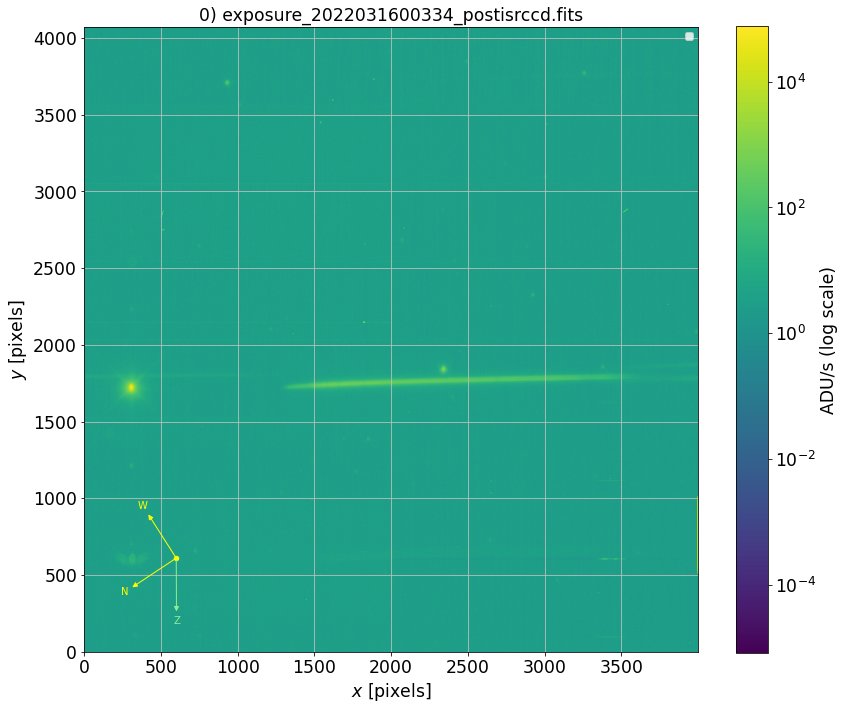

In [59]:
title="{}) {}".format(idx,filename_image)
image.plot_image(figsize=(12, 10),scale="log",title=title)

- note now the position are written in the make_logbook.ipynb notebook

## Set the 0th order location to be provided to Spectractor

In [60]:
filename_image

'exposure_2022031600334_postisrccd.fits'

In [61]:
# overwrite if localtion is taken from that in logbook
if FLAG_ORDER0_LOCATION : 
    print("Set Order 0 location from logbook : ({},{})".format(x0,y0))
    guess = [x0,y0]

Set Order 0 location from logbook : (300,1700)


## Let Spectractor find the location of the 0th order

2022-05-20 17:10:31  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
          c0_0               c1_0                 c0_1       
    ---------------- -------------------- -------------------
    7.25022507308669 0.030625914414829862 0.07989877052562233
2022-05-20 17:10:31  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=1.25e-05.
2022-05-20 17:10:32  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


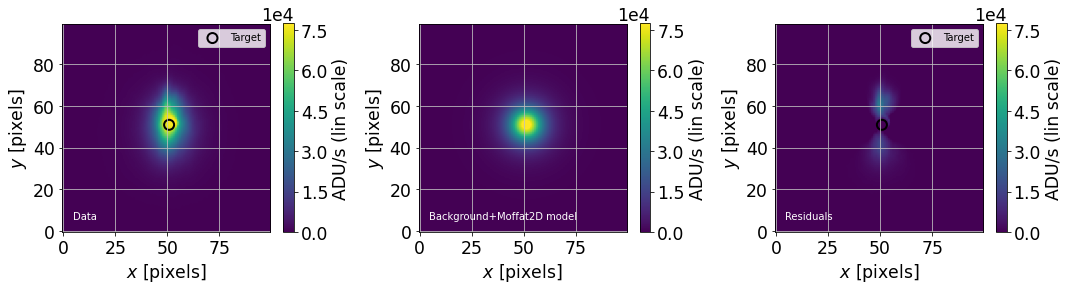

In [62]:

parameters.VERBOSE = True
parameters.DEBUG = True
#x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)
x1, y1 = find_target(image, guess,rotated=False)

In [63]:
print(x1,y1)

307.86449047359423 1723.9106774314253


## Check the location of 0th order and Analysis of the quality of its focus

In [64]:
if x1>100:
    WID=100
else:
    WID=50
    

thumbnail=np.copy(image.data[int(y1)-WID:int(y1)+WID,int(x1)-WID:int(x1)+WID])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-WID,int(x1)+WID,len(thumbnail_x))
yy=np.linspace(int(y1)-WID,int(y1)+WID,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)
        

In [65]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [66]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [67]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [68]:
kurtosis_test_prob=kurtosistest(thumbnail,axis=None).pvalue
skew_test_prob=skewtest(thumbnail,axis=None).pvalue
normal_test_prob=normaltest(thumbnail,axis=None).pvalue

In [69]:
kurtosis_test_val=kurtosistest(thumbnail,axis=None).statistic
skew_test_val=skewtest(thumbnail,axis=None).statistic
normal_test_val=normaltest(thumbnail,axis=None).statistic

In [70]:
kurtosis_test_prob_x=kurtosistest(thumbnail_x).pvalue
skew_test_prob_x=skewtest(thumbnail_x).pvalue
normal_test_prob_x=normaltest(thumbnail_x).pvalue

In [71]:
kurtosis_test_prob_y=kurtosistest(thumbnail_y).pvalue
skew_test_prob_y=skewtest(thumbnail_y).pvalue
normal_test_prob_y=normaltest(thumbnail_y).pvalue

In [72]:
skew_str='\n'.join((
    r'skew     : Sk0 = {:3.3f}'.format(s0),
    r'             : Skx = {:3.3f}'.format(sx),
    r'             : Sky = {:3.3f}'.format(sy),
    r'             : p_test   = {:3.3e}'.format(skew_test_prob),
    r'             : p_test_x = {:3.3e}'.format(skew_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(skew_test_prob_y)))

In [73]:
kurt_str='\n'.join((
    r'kurtosis : K0 = {:3.3f}'.format(k0),
    r'             : Kx = {:3.3f}'.format(kx),
    r'             : Ky = {:3.3f}'.format(ky),
    r'             : p_test   = {:3.3e}'.format(kurtosis_test_prob),
    r'             : p_test_x = {:3.3e}'.format(kurtosis_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(kurtosis_test_prob_y)))

In [74]:
norm_str='\n'.join((
    r'normal  : p_test   = {:3.3e}'.format(normal_test_prob),
    r'             : p_test_x = {:3.3e}'.format(normal_test_prob_x),
    r'             : p_test_y = {:3.3e}'.format(normal_test_prob_y)))

In [75]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [76]:
#matplotlib.pyplot.hist(x, 
#                       bins=10, 
#                       range=None, 
#                       normed=False, 
#                       weights=None, 
#                       cumulative=False, 
#                       bottom=None, 
#                       histtype=u'bar', 
#                       align=u'mid', 
#                       orientation=u'vertical', 
#                       rwidth=None, 
#                       log=False, 
#                       color=None, 
#                       label=None, 
#                       stacked=False, 
#                       hold=None, 
#                       **kwargs)

Text(0.5, 0.98, '0) exposure_2022031600334_postisrccd.fits')

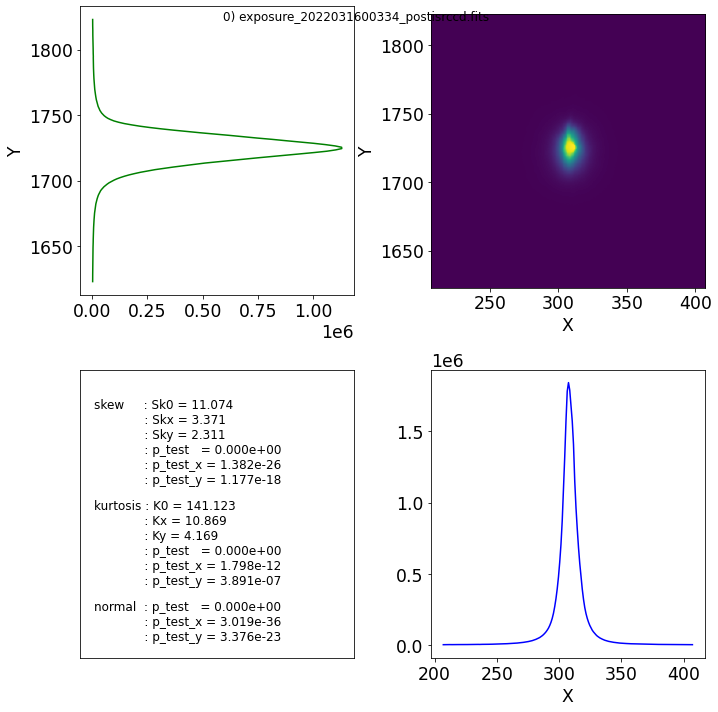

In [77]:
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-WID,int(x1)+WID,int(y1)-WID,int(y1)+WID))
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax=fig.add_subplot(221)
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(-90)
#ax.plot(yy,thumbnail_y,"g",rotation=u'vertical')
ax.plot(-yy,thumbnail_y,"g",transform= rot + base)
ax.set_ylabel("Y")

ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()

ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.55, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.2, norm_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
plt.suptitle(title)

In [78]:
# Usually stop here if one just want to get the 0th order location
if not FLAG_GO_FOR_RECONSTRUCTION_WTH_SPECTRACTOR:
    assert False
else:
    assert True

# Go for spectrum reconstruction

In [79]:
#parameters.debug=True
#parameters.verbose=True
#parameters.display=True
#parameters.LIVE_FIT=False

In [80]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [81]:
filename

'/sps/lsst/groups/auxtel/data/2022/empty~ronchi170lpmm/20220316/exposure_2022031600334_postisrccd.fits'

In [82]:
#spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)

In [ ]:
try:
    spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)
except:
    errtype = sys.exc_info()[0]  # E.g. <class 'PermissionError'>
    description = sys.exc_info()[1]   # E.g. [Errno 13] Permission denied: ...
        
    print("\t +++++++++++++++++++++ Exception occured +++++++++++++++++++++++++++++++++++++++++")
    print(f"\t >>>>>  errtype = {errtype}")
    print(f"\t >>>>>> description = {description}")

2022-05-20 17:10:34  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2022-05-20 17:10:34  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /sps/lsst/groups/auxtel/data/2022/empty~ronchi170lpmm/20220316/exposure_2022031600334_postisrccd.fits...
2022-05-20 17:10:34  Image      load_AUXTEL_image    INFO   
	Image loaded


No rebinning: parameters.REBIN is forced to 1.
Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: pipeline
x spectractor_fit_target_centroid: fit	=> parameters.SPECTRACTOR_FIT_TARGET_CENTROID: fit	 <class 'str'>
x spectractor_compute_rotation_angle: hessian	=> parameters.SPECTRACTOR_COMPUTE_ROTATION_ANGLE: hessian	 <class 'str'>
x spectractor_deconvolution_psf2d: False	=> parameters.SPECTRACTOR_DECONVOLUTION_PSF2D: False	 <class 'bool'>
x spectractor_deconvolution_ffm: True	=> parameters.SPECTRACTOR_DECONVOLUTION_FFM: True	 <class 'bool'>
x spectractor_deconvolution_sigm

2022-05-20 17:10:34  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2022-05-20 17:10:35  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/ronchi170lpmm
2022-05-20 17:10:35  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of -1.1 degrees
2022-05-20 17:10:38  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.396545452188295 but average of self.read_out_noise is 8.5.
2022-05-20 17:10:39  Star       load                 INFO   
	Simbad:
  MAIN_ID         RA           DEC      ... Z_VALUE_2 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817

target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ... Z_VALUE_2 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 0.0000590                1


2022-05-20 17:10:41  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 307.86449047 1723.91067743]...
2022-05-20 17:10:41  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                 c0_1        
    ------------------ -------------------- --------------------
    17.090364187689794 0.004866878293818019 0.006044086821154264
2022-05-20 17:10:41  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=1.25e-05.
2022-05-20 17:10:42  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.
2022-05-20 17:10:42  Image      find_target          INFO   
	X,Y target position in pixels: 307.865,1723.915
2022-05-20

# Backup output

In [ ]:
copy_tree(output_directory,os.path.join(finalpath_output_spectractor,"basespec"))

In [ ]:
copy_tree(output_figures,os.path.join(finalpath_output_spectractor,"plots"))

In [ ]:
!ls -l  $finalpath_output_spectractor/basespec

In [ ]:
!ls -l  $finalpath_output_spectractor/plots

In [ ]:
finalpath_output_spectractor